# 6주차_선형회귀분석_문제

## 모듈 불러오기

In [0]:
from IPython.display import display, HTML

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 데이터 불러오기

### Toyota Corolla Data
### 중고차 가격(Price)를 예측하기 위한 예측모델 학습

In [0]:
bedal = np.array([[100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

In [0]:
nam = ['Distance', 'Time']

In [0]:
data = pd.DataFrame(bedal, columns=nam)

In [21]:
display(data.head())

,Distance,Time
0,100,20
1,150,24
2,300,36
3,400,47
4,130,22


## 데이터 전처리하기

### 2. 학습 데이터와 테스트 데이터로 분리

In [0]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20191029) # 세 곳 써주세요!

## 모델링

### 학습 데이터를 이용하여 선형회귀모델 학습

In [0]:
lm = sm.OLS(train_data['Time'], train_data.drop('Time', axis=1)) # 두 곳 써주세요!
lm_trained = lm.fit()

### 모델 학습 결과 (Summary) 확인

In [27]:
lm_trained.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Time   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              167.8
Date:                Tue, 29 Oct 2019   Prob (F-statistic):                    4.01e-07
Time:                        10:47:26   Log-Likelihood:                         -33.597
No. Observations:                  10   AIC:                                      69.19
Df Residuals:                       9   BIC:                                      69.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.1351      0.010     12.953      0.000       0.112       0.159
==============================================================================
Omnibus:                        0.333   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.404
Skew:                           0.318   Prob(JB):                        0.817
Kurtosis:                       2.248   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 예측성능 평가

### 1. 학습 데이터셋에 대한 예측성능 평가
MSE, RMSE 계산하여 성능 확인

In [28]:
train_data.head()

,Distance,Time
4,130,22
11,120,25
14,255,28
12,130,18
2,300,36


In [30]:
train_pred = lm_trained.predict(train_data.drop(['Time'], axis=1)) # 써주세요!

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['Time'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['Time'], train_pred))))

Training MSE: 48.502
Training RMSE: 6.964


### 2. 테스트 데이터셋에 대한 예측성능 평가
MSE, RMSE 계산하여 성능 확인

In [31]:
test_data.head()

,Distance,Time
13,270,38
6,350,47
0,100,20
10,190,30
8,100,21


In [32]:
test_pred = lm_trained.predict(test_data.drop(['Time'], axis=1)) # 써주세요!

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['Time'], test_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['Time'], test_pred))))

Testing MSE: 23.880
Training RMSE: 4.887


## 결과 출력

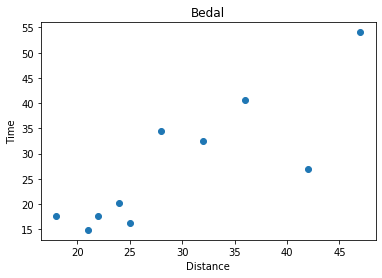

In [35]:
plt.scatter(train_data['Time'], train_pred) # 써주세요!
plt.xlabel("Distance")
plt.ylabel("Time")
plt.title("Bedal")
plt.show()

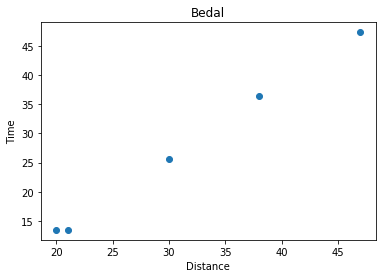

In [36]:
plt.scatter(test_data['Time'], test_pred) # 써주세요!
plt.xlabel("Distance")
plt.ylabel("Time")
plt.title("Bedal")
plt.show()

In [61]:
myInput = pd.DataFrame(
    {
     "Distance": [1000]
    }
)
myInput.head()

,Distance
0,1000


In [67]:
my_pred = lm_trained.predict(myInput['Distance']) # 써주세요!
print('예측 소요시간 : {:.1f}'.format(my_pred[0]),'분')

예측 소요시간 : 135.1 분
